<a href="https://colab.research.google.com/github/dewannadim007-create/meso_practice/blob/main/mesopracticeOldDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install torchsummary

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:

# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [ ]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0

    def predict(self, x):
        return self.model.predict(x)

    def fit(self, x, y):
        return self.model.train_on_batch(x, y)

    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)

    def load(self, path):
        self.model.load_weights(path)

In [ ]:
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'binary_crossentropy',
                           metrics = ['accuracy'])

    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))

        # Block 1 (x -> x1)
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

        # Block 2 (x1 -> x2)
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

        # Block 3 (x2 -> x3)
        # This is where the indentation was off in the source
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

        # Block 4 (x3 -> x4)
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

        # Classifier
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

meso = Meso4()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
!pip install kaggle
!pip install opendatasets

In [ ]:
import opendatasets as od


In [ ]:
od.download ('https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nadim007
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces


100%|██████████| 3.75G/3.75G [00:53<00:00, 74.7MB/s]


In [ ]:
od.download ('https://www.kaggle.com/datasets/dewannadim/meso-dataset-for-test-and-train')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nadim007
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dewannadim/meso-dataset-for-test-and-train


100%|██████████| 1.32G/1.32G [00:26<00:00, 53.9MB/s]


In [ ]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)
# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    '/content/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train',
    target_size=(256, 256),
    batch_size=100, # Using the batch_size variable defined previously
    class_mode='binary')
#'/content/python-youtube-code/Deepfake-detection/data'

Found 100000 images belonging to 2 classes.


In [ ]:
generator.class_indices

{'fake': 0, 'real': 1}

In [ ]:
import torch
from torchsummary import summary
meso.model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 8)    │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        16,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,073 (109.66 KB)

 Trainable params: 27,977 (109.29 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
num_epochs = 10
num_classes = 2
batch_size = 1000
learning_rate = 0.001

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
print(f"Training the MesoNet model for {num_epochs} epochs...")

history = meso.model.fit(
    generator,
    epochs=10,
    verbose=1
)

Training the MesoNet model for 10 epochs...
Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 284s 283ms/step - accuracy: 0.5866 - loss: 0.7315
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 230s 230ms/step - accuracy: 0.7167 - loss: 0.5550
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 263s 231ms/step - accuracy: 0.7981 - loss: 0.4468
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 229s 228ms/step - accuracy: 0.8413 - loss: 0.3706
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 228s 228ms/step - accuracy: 0.8709 - loss: 0.3155
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 231s 230ms/step - accuracy: 0.8833 - loss: 0.2863
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 231s 231ms/step - accuracy: 0.8956 - loss: 0.2613
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 230s 229ms/step - accuracy: 0.9055 - loss: 0.2393
Epoch 9/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 229s 229ms/step - accuracy: 0.9114 - loss: 0.2254
Epoch 10/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 231s 231ms/step - accuracy: 0.9189 - loss: 0.2111


In [ ]:
print(generator.samples)
#train (anotherdataset) daata number

100000


In [ ]:
validation_dir = '/content/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid'

validation_dataGenerator = ImageDataGenerator(rescale=1./255)

validation_generator = validation_dataGenerator.flow_from_directory(
    validation_dir,
    target_size=(image_dimensions['height'], image_dimensions['width']),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

print(f"Retraining the MesoNet model with validation data for {num_epochs} epochs...")

history_with_validation = meso.model.fit(
    generator,
    epochs=num_epochs,
    verbose=1,
    validation_data=validation_generator
)

Found 20000 images belonging to 2 classes.
Retraining the MesoNet model with validation data for 10 epochs...
Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9201 - loss: 0.2017

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 289s 289ms/step - accuracy: 0.9201 - loss: 0.2017 - val_accuracy: 0.9284 - val_loss: 0.1823
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 276s 276ms/step - accuracy: 0.9268 - loss: 0.1906 - val_accuracy: 0.9338 - val_loss: 0.1644
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 273s 273ms/step - accuracy: 0.9285 - loss: 0.1868 - val_accuracy: 0.8351 - val_loss: 0.3696
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 278s 278ms/step - accuracy: 0.9290 - loss: 0.1796 - val_accuracy: 0.9035 - val_loss: 0.2339
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 277s 277ms/step - accuracy: 0.9346 - loss: 0.1730 - val_accuracy: 0.9396 - val_loss: 0.1716
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 273s 273ms/step - accuracy: 0.9347 - loss: 0.1708 - val_accuracy: 0.9379 - val_loss: 0.1557
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 282s 282ms/step - accuracy: 0.9375 - loss: 0.1639 - val_accuracy: 0.9502 - val_loss: 0.1294
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 278s 278ms/step - accuracy: 0.9

In [ ]:
#extra added dataset for training




new_train_dir = '/content/meso-dataset-for-test-and-train/meso_data/Train'

# Create an ImageDataGenerator for the new training data
new_dataGenerator = ImageDataGenerator(rescale=1./255)


In [ ]:
new_train_generator = new_dataGenerator.flow_from_directory(
    new_train_dir,
    target_size=(image_dimensions['height'], image_dimensions['width']),
    batch_size=batch_size, # Using the batch_size variable defined previously
    class_mode='binary',
    classes=['fake', 'real'])

print(f"Training the MesoNet model with a new dataset for {num_epochs} epochs...")

# Re-train the model with the new generator
history_new_train = meso.model.fit(
    new_train_generator,
    epochs=num_epochs,
    verbose=1
)

In [ ]:
# Define the path to your test directory
test_dir = '/content/meso-dataset-for-test-and-train/meso_data/Test'


test_dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiate a generator for the test data
test_generator = test_dataGenerator.flow_from_directory(
    test_dir,
    target_size=(image_dimensions['height'], image_dimensions['width']),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

print("Evaluating the model on the test set...")
loss, accuracy = meso.model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Found 10905 images belonging to 2 classes.
Evaluating the model on the test set...
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2080 - loss: 5.4721
Test Loss: 3.4664
Test Accuracy: 0.4928


In [ ]:
# Define the path to your test directory
test_dir = '/content/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test'


test_dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiate a generator for the test data
test_generator = test_dataGenerator.flow_from_directory(
    test_dir,
    target_size=(image_dimensions['height'], image_dimensions['width']),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

print("Evaluating the model on the test set...")
loss, accuracy = meso.model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Found 20000 images belonging to 2 classes.
Evaluating the model on the test set...
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9169 - loss: 0.2218
Test Loss: 0.1651
Test Accuracy: 0.9390


11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step


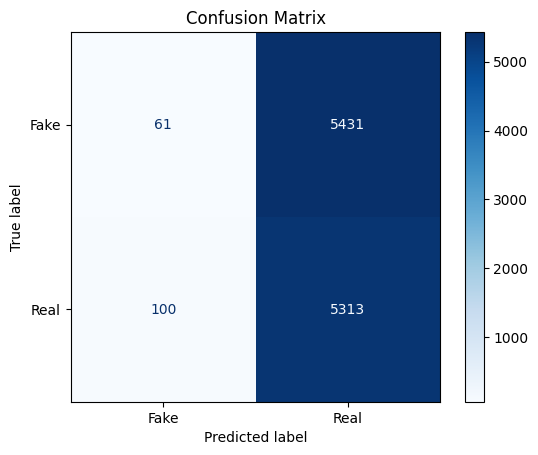

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get true labels from the test generator
true_labels = test_generator.classes

# Get predictions from the model
# It's important to reset the generator before predicting to ensure predictions align with true_labels
test_generator.reset()
predictions = meso.model.predict(test_generator)

# Convert probabilities to binary class labels (0 or 1) using a threshold of 0.5
predicted_labels = (predictions > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Get class names from the generator for display
class_names = list(test_generator.class_indices.keys())

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
total_images_trained = generator.samples + new_train_generator.samples
print(f"Total number of images fed for training: {total_images_trained}")

NameError: name 'new_train_generator' is not defined

In [ ]:
from google.colab import files
from PIL import Image
import io

# Function to preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).resize((image_dimensions['height'], image_dimensions['width']))
    img_array = np.array(img)
    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Rescale pixel values to [0, 1]
    img_array = img_array / 255.0
    return img_array

# Upload the image
uploaded = files.upload()

for fn in uploaded.keys():
    # Preprocess the uploaded image
    img_array = preprocess_image(io.BytesIO(uploaded[fn]))

    # Make prediction
    prediction = meso.model.predict(img_array)

    # Interpret prediction
    if prediction[0][0] > 0.5:
        print(f"The uploaded image is predicted as: Real with probability {prediction[0][0]:.4f}")
    else:
        print(f"The uploaded image is predicted as: Fake with probability {1 - prediction[0][0]:.4f}")

Saving ultrafake.jpg to ultrafake.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The uploaded image is predicted as: Real with probability 1.0000
